In [46]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


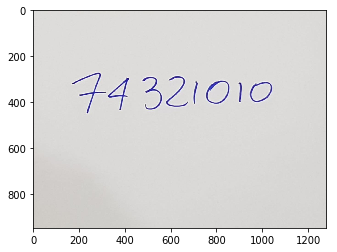

In [47]:
# Read the input image 
img = cv.imread("numbers.jpg")

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

### CONVERTER PARA ESCALA DE CINZA

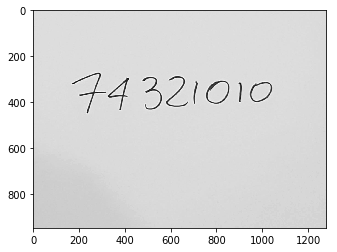

In [48]:
im_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(im_gray,cmap='gray')
plt.show()

O desfoque gaussiano é altamente eficaz na remoção do ruído gaussiano da imagem.

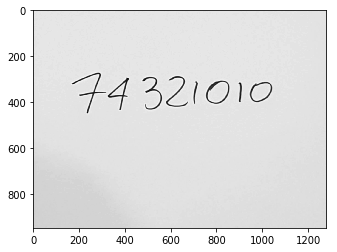

In [49]:
im_gauss = cv.GaussianBlur(im_gray, (5, 5), 0)

plt.imshow(im_gauss,cmap='gray')
plt.show()

***cv2.threshold***

Threshold traz a ideia de uma simplificação da imagem para facilitar análise, trazendo onde estão os limites da imagem em questão.

argumentos da função:

- 1 - Uma imagem em tons de cinza
- 2 - Limiar de intensidade para binarização
- 3 - 255 intensidade máxima
- 4 - Transforma em binário 
    - THRESH_BINARY      - Binário Normal
    - THRESH_BINARY_INV  - Binário invertido


A função ***cv.adaptiveThreshold*** também faz análise adaptativa

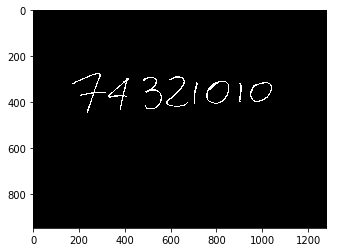

In [50]:
# BUSCANDO O LIMIAR DA IMAGE

#  im_gray.max() TEM A INTENSIDADE MÁXIMA DA IMAGEM
ret, im_th = cv.threshold(im_gauss, im_gray.max()/2, im_gray.max(), cv.THRESH_BINARY_INV)

plt.imshow(im_th,cmap='gray')
plt.show()

### BUSCAR CONTORNOS DA IMAGEM

In [51]:
ctrs, hier = cv.findContours(im_th.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

##### CRIAR RETÂNGULOS DOS CONTORNOS

In [52]:
rects = [cv.boundingRect(ctr) for ctr in ctrs]
rects

[(896, 316, 13, 84),
 (944, 314, 97, 87),
 (699, 312, 18, 96),
 (754, 308, 101, 100),
 (326, 295, 92, 139),
 (476, 292, 85, 141),
 (580, 288, 93, 133),
 (169, 274, 148, 175)]

### ORDENANDO POSIÇÃO DOS RETÂNGULOS DA ESQUEDA PARA DIREITA

In [53]:
rects.sort()
rects

[(169, 274, 148, 175),
 (326, 295, 92, 139),
 (476, 292, 85, 141),
 (580, 288, 93, 133),
 (699, 312, 18, 96),
 (754, 308, 101, 100),
 (896, 316, 13, 84),
 (944, 314, 97, 87)]

### CRIAR ÁREA SELECIONÁVEL

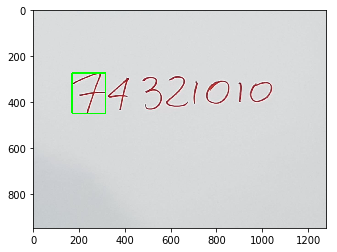

In [69]:
## CRIAR RETÂNGULOS NA IMAGEM ORIGINAL

  # DESENHAR RETANGULOS   

    #  x1,y1 ------
    #  |          |
    #  |          |
    #  |          |
    #  --------x2,y2

## selecionando propriedades do retângulo
x, y, w, h = rects[0]

## desenhando retângulo
cv.rectangle(img,  (x, y),  (x+w,y+h),  (0, 255, 0), 3) 

plt.imshow(img)
plt.show()


## SELECIONAR NÚMERO

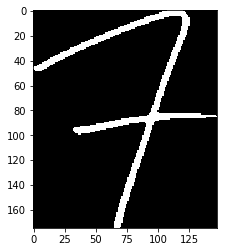

In [60]:
start_row = y
end_row   = y + h
    
start_col = x
end_col   = x + w

new_roi = im_th[ start_row : end_row,  start_col : end_col]

plt.imshow(new_roi, cmap='gray')
plt.show()

### RESIZE & PADDING

In [77]:
## TAMANHO DESEJADO
tam_final = 28

## TAMANHO ORIGINAL
old_size = new_roi.shape[:2]

## VERIFICANDO PROPORÇÃO
ratio = float(tam_final*0.8)/max(old_size)

## ALTERANDO PROPORÇÃO
new_size = tuple([int(x*ratio) for x in old_size])

## REDIMENSIONANDO IMAGEM USANDO PROPORÇÃO
new_roi = cv.resize(new_roi, (new_size[1], new_size[0]))

## PADDING
delta_w = tam_final - new_size[1]
delta_h = tam_final - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

## CRIANDO UMA BORDA ESCURA
color = [0, 0, 0]
new_im = cv.copyMakeBorder(new_roi, top, bottom, left, right, cv.BORDER_CONSTANT, value=color)

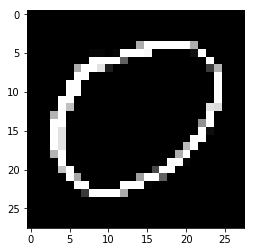

In [78]:
plt.imshow(new_im, cmap='gray')
plt.show()

### ROI = Region of Interest

In [79]:
roi = []

## TAMANHO DESEJADO
tam_final = 28

for rect in rects:
    ## selecionando propriedades do retângulo
    x, y, w, h = rect
  
    
    start_row = y
    end_row   = y + h  
    start_col = x
    end_col   = x + w

    new_roi = im_th[ start_row : end_row,  start_col : end_col]

     

    ## TAMANHO ORIGINAL
    old_size = new_roi.shape[:2]

    ## VERIFICANDO PROPORÇÃO
    ratio = float(tam_final*0.8)/max(old_size)

    ## ALTERANDO PROPORÇÃO
    new_size = tuple([int(x*ratio) for x in old_size])

    ## REDIMENSIONANDO IMAGEM USANDO PROPORÇÃO
    new_roi = cv.resize(new_roi, (new_size[1], new_size[0]))

    ## PADDING
    delta_w = tam_final - new_size[1]
    delta_h = tam_final - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    ## CRIANDO UMA BORDA ESCURA
    color = [0, 0, 0]
    new_im = cv.copyMakeBorder(new_roi, top, bottom, left, right, cv.BORDER_CONSTANT, value=color)

        
    roi.append(new_im)
    
roi = np.array(roi)

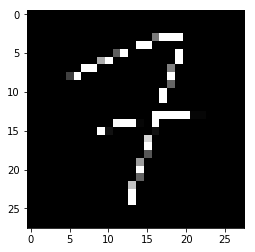

In [82]:
plt.imshow(roi[0], cmap='gray')
plt.show()

In [83]:
from tensorflow.keras.models import load_model

In [84]:
model = load_model('Carteiro.h5')

OSError: Unable to open file (unable to open file: name = 'Carteiro.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)